In [25]:
# Import dependencies
import json
import pandas as pd
import numpy as np
import re

!pip install fsspec

In [2]:
# Import the Wikipedia JSON 
file_dir = 'C://Users/jabar/Dropbox/Jabari/Documents - Current/DA Boot Camp/Challenges/Movies-ETL'

with open(f'{file_dir}/wikipedia-movies.json', mode='r') as file:
    wiki_movies_raw = json.load(file)
    
len(wiki_movies_raw)

7311

In [3]:
# First 5 records
wiki_movies_raw[:5]

[{'url': 'https://en.wikipedia.org/wiki/The_Adventures_of_Ford_Fairlane',
  'year': 1990,
  'imdb_link': 'https://www.imdb.com/title/tt0098987/',
  'title': 'The Adventures of Ford Fairlane',
  'Directed by': 'Renny Harlin',
  'Produced by': ['Steve Perry', 'Joel Silver'],
  'Screenplay by': ['David Arnott', 'James Cappe', 'Daniel Waters'],
  'Story by': ['David Arnott', 'James Cappe'],
  'Based on': ['Characters', 'by Rex Weiner'],
  'Starring': ['Andrew Dice Clay',
   'Wayne Newton',
   'Priscilla Presley',
   'Lauren Holly',
   'Morris Day',
   'Robert Englund',
   "Ed O'Neill"],
  'Narrated by': 'Andrew "Dice" Clay',
  'Music by': ['Cliff Eidelman', 'Yello'],
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Michael Tronick',
  'Productioncompany ': 'Silver Pictures',
  'Distributed by': '20th Century Fox',
  'Release date': ['July 11, 1990', '(', '1990-07-11', ')'],
  'Running time': '102 minutes',
  'Country': 'United States',
  'Language': 'English',
  'Budget': '$20 million',


In [4]:
# Last 5 records
wiki_movies_raw[-5:]

[{'url': 'https://en.wikipedia.org/wiki/Holmes_%26_Watson',
  'year': 2018,
  'imdb_link': 'https://www.imdb.com/title/tt1255919/',
  'title': 'Holmes & Watson',
  'Directed by': 'Etan Cohen',
  'Produced by': ['Will Ferrell',
   'Adam McKay',
   'Jimmy Miller',
   'Clayton Townsend'],
  'Screenplay by': 'Etan Cohen',
  'Based on': ['Sherlock Holmes',
   'and',
   'Dr. Watson',
   'by',
   'Sir Arthur Conan Doyle'],
  'Starring': ['Will Ferrell',
   'John C. Reilly',
   'Rebecca Hall',
   'Rob Brydon',
   'Steve Coogan',
   'Ralph Fiennes'],
  'Music by': 'Mark Mothersbaugh',
  'Cinematography': 'Oliver Wood',
  'Edited by': 'Dean Zimmerman',
  'Productioncompanies ': ['Columbia Pictures',
   'Gary Sanchez Productions',
   'Mosaic Media Group',
   'Mimran Schur Pictures'],
  'Distributed by': 'Sony Pictures Releasing',
  'Release date': ['December 25, 2018',
   '(',
   '2018-12-25',
   ')',
   '(United States)'],
  'Running time': '90 minutes',
  'Country': 'United States',
  'Language

In [5]:
# Some records in the middle
wiki_movies_raw[3600:3605]

[{'url': 'https://en.wikipedia.org/wiki/Benji:_Off_the_Leash!',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0315273/',
  'title': 'Benji: Off the Leash!',
  'Directed by': 'Joe Camp',
  'Written by': 'Joe Camp',
  'Starring': ['Benji', 'Nick Whitaker', 'Shaggy', 'Gypsy the Cockatoo'],
  'Music by': 'Antonio di Lorenzo',
  'Productioncompany ': 'Mulberry Square Productions',
  'Distributed by': 'Mulberry Square Productions',
  'Release date': ['March 26, 2004', '(', '2004-03-26', ')'],
  'Running time': '97 min',
  'Country': 'United States',
  'Language': 'English',
  'Box office': '$3,817,362'},
 {'url': 'https://en.wikipedia.org/wiki/The_Best_Thief_in_the_World',
  'year': 2004,
  'imdb_link': 'https://www.imdb.com/title/tt0389796/',
  'title': 'The Best Thief in the World',
  'Directed by': 'Jacob Kornbluth',
  'Produced by': ['Tim Perrell', 'Nicola Usborne'],
  'Written by': 'Jacob Kornbluth',
  'Starring': ['Marc Rozendaal',
   'Michael Silverman',
   'David Warsh

In [6]:
# Import Kaggle data
kaggle_metadata = pd.read_csv(f'{file_dir}/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv(f'{file_dir}/ratings.csv')
ratings.tail()

userId  movieId  rating   timestamp
26024284  270896    58559     5.0  1257031564
26024285  270896    60069     5.0  1257032032
26024286  270896    63082     4.5  1257031764
26024287  270896    64957     4.5  1257033990
26024288  270896    71878     2.0  1257031858

In [7]:
# Convert Wikipedia data into a DataFrame
wiki_movies_df = pd.DataFrame(wiki_movies_raw)
wiki_movies_df.head()

url    year  \
0  https://en.wikipedia.org/wiki/The_Adventures_o...  1990.0   
1  https://en.wikipedia.org/wiki/After_Dark,_My_S...  1990.0   
2   https://en.wikipedia.org/wiki/Air_America_(film)  1990.0   
3    https://en.wikipedia.org/wiki/Alice_(1990_film)  1990.0   
4      https://en.wikipedia.org/wiki/Almost_an_Angel  1990.0   

                               imdb_link                            title  \
0  https://www.imdb.com/title/tt0098987/  The Adventures of Ford Fairlane   
1  https://www.imdb.com/title/tt0098994/             After Dark, My Sweet   
2  https://www.imdb.com/title/tt0099005/                      Air America   
3  https://www.imdb.com/title/tt0099012/                            Alice   
4  https://www.imdb.com/title/tt0099018/                  Almost an Angel   

          Directed by                  Produced by  \
0        Renny Harlin   [Steve Perry, Joel Silver]   
1         James Foley  [Ric Kidney, Robert Redlin]   
2  Roger Spottiswoode               Daniel Melnick   
3         Woody Allen              Robert Greenhut   
4        John Cornell                 John Cornell   

                                Screenplay by                     Story by  \
0  [David Arnott, James Cappe, Daniel Waters]  [David Arnott, James Cappe]   
1                [James Foley, Robert Redlin]                          NaN   
2                  [John Eskow, Richard Rush]                          NaN   
3                                         NaN                          NaN   
4                                         NaN                          NaN   

                                            Based on  \
0                        [Characters, by Rex Weiner]   
1  [the novel, After Dark, My Sweet, by, Jim Thom...   
2             [Air America, by, Christopher Robbins]   
3                                                NaN   
4                                                NaN   

                                            Starring  ... Predecessor  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...  ...         NaN   
1  [Jason Patric, Rachel Ward, Bruce Dern, George...  ...         NaN   
2  [Mel Gibson, Robert Downey Jr., Nancy Travis, ...  ...         NaN   
3  [Alec Baldwin, Blythe Danner, Judy Davis, Mia ...  ...         NaN   
4        [Paul Hogan, Elias Koteas, Linda Kozlowski]  ...         NaN   

  Founders Area served Products Services Russian Hebrew Revenue  \
0      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
1      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
2      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
3      NaN         NaN      NaN      NaN     NaN    NaN     NaN   
4      NaN         NaN      NaN      NaN     NaN    NaN     NaN   

  Operating income Polish  
0              NaN    NaN  
1              NaN    NaN  
2              NaN    NaN  
3              NaN    NaN  
4              NaN    NaN  

[5 rows x 193 columns]

In [8]:
# Inspect Wikipedia column names
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Also known as',
 'Opening theme',
 'No. of episodes',
 'Preceded by',
 'Author',
 'Publisher',
 'Publication date',
 'Media type',
 'Pages',
 'ISBN',
 'OCLC',
 'LC Class',
 'Cover artist',
 'Series',
 'Set in',
 'Adaptation by',
 'Suggested by',
 'Biographical data',
 'Born',
 'Died',
 'Resti

In [9]:
# Filter Wikipedia data for only entries with a Diretor and IMDb link
wiki_movies = [movie for movie in wiki_movies_raw
               if ('Director' in movie or 'Directed by' in movie)
                   and 'imdb_link' in movie
                   and 'No. of episodes' not in movie]
len(wiki_movies)

7076

In [10]:
# Create new DataFrame from the filtered results
wiki_movies_df = pd.DataFrame(wiki_movies)
wiki_movies_df.columns.tolist()

['url',
 'year',
 'imdb_link',
 'title',
 'Directed by',
 'Produced by',
 'Screenplay by',
 'Story by',
 'Based on',
 'Starring',
 'Narrated by',
 'Music by',
 'Cinematography',
 'Edited by',
 'Productioncompany ',
 'Distributed by',
 'Release date',
 'Running time',
 'Country',
 'Language',
 'Budget',
 'Box office',
 'Written by',
 'Genre',
 'Theme music composer',
 'Country of origin',
 'Original language(s)',
 'Producer(s)',
 'Editor(s)',
 'Production company(s)',
 'Original network',
 'Original release',
 'Productioncompanies ',
 'Executive producer(s)',
 'Production location(s)',
 'Distributor',
 'Picture format',
 'Audio format',
 'Voices of',
 'Followed by',
 'Composer(s)',
 'Created by',
 'Preceded by',
 'Adaptation by',
 'Suggested by',
 'Traditional',
 'Mandarin',
 'Released',
 'Recorded',
 'Venue',
 'Length',
 'Label',
 'Director',
 'Producer',
 'Also known as',
 'Animation by',
 'Color process',
 'Simplified',
 'French',
 'Screen story by',
 'Hangul',
 'Revised Romanization

In [14]:
# Clean movie data
def clean_movie(movie):
    movie = dict(movie) #create a non-destructive copy
    alt_titles = {}
    # combine alternate titles into one list
    for key in ['Also known as','Arabic','Cantonese','Chinese','French',
                'Hangul','Hebrew','Hepburn','Japanese','Literally',
                'Mandarin','McCune-Reischauer','Original title','Polish',
                'Revised Romanization','Romanized','Russian',
                'Simplified','Traditional','Yiddish']:
        if key in movie:
            alt_titles[key] = movie[key]
            movie.pop(key)
    if len(alt_titles) > 0:
        movie['alt_titles'] = alt_titles

    # merge column names
    def change_column_name(old_name, new_name):
        if old_name in movie:
            movie[new_name] = movie.pop(old_name)
    change_column_name('Adaptation by', 'Writer(s)')
    change_column_name('Country of origin', 'Country')
    change_column_name('Directed by', 'Director')
    change_column_name('Distributed by', 'Distributor')
    change_column_name('Edited by', 'Editor(s)')
    change_column_name('Length', 'Running time')
    change_column_name('Original release', 'Release date')
    change_column_name('Music by', 'Composer(s)')
    change_column_name('Produced by', 'Producer(s)')
    change_column_name('Producer', 'Producer(s)')
    change_column_name('Productioncompanies ', 'Production company(s)')
    change_column_name('Productioncompany ', 'Production company(s)')
    change_column_name('Released', 'Release Date')
    change_column_name('Release Date', 'Release date')
    change_column_name('Screen story by', 'Writer(s)')
    change_column_name('Screenplay by', 'Writer(s)')
    change_column_name('Story by', 'Writer(s)')
    change_column_name('Theme music composer', 'Composer(s)')
    change_column_name('Written by', 'Writer(s)')

    return movie

clean_movies = [clean_movie(movie) for movie in wiki_movies]
wiki_movies_df = pd.DataFrame(clean_movies)
sorted(wiki_movies_df.columns.tolist())

['Animation by',
 'Audio format',
 'Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Color process',
 'Composer(s)',
 'Country',
 'Created by',
 'Director',
 'Distributor',
 'Editor(s)',
 'Executive producer(s)',
 'Followed by',
 'Genre',
 'Label',
 'Language',
 'McCune–Reischauer',
 'Narrated by',
 'Original language(s)',
 'Original network',
 'Picture format',
 'Preceded by',
 'Producer(s)',
 'Production company(s)',
 'Production location(s)',
 'Recorded',
 'Release date',
 'Running time',
 'Starring',
 'Suggested by',
 'Venue',
 'Voices of',
 'Writer(s)',
 'alt_titles',
 'imdb_link',
 'title',
 'url',
 'year']

In [15]:
# Extract the IMDb ID
wiki_movies_df['imdb_id'] = wiki_movies_df['imdb_link'].str.extract(r'(tt\d{7})')
print(len(wiki_movies_df))

7076


In [16]:
# Drop any duplicates of IMDb IDs
wiki_movies_df.drop_duplicates(subset='imdb_id', inplace=True)
print(len(wiki_movies_df))
wiki_movies_df.head()

7033


url  year  \
0  https://en.wikipedia.org/wiki/The_Adventures_o...  1990   
1  https://en.wikipedia.org/wiki/After_Dark,_My_S...  1990   
2   https://en.wikipedia.org/wiki/Air_America_(film)  1990   
3    https://en.wikipedia.org/wiki/Alice_(1990_film)  1990   
4      https://en.wikipedia.org/wiki/Almost_an_Angel  1990   

                               imdb_link                            title  \
0  https://www.imdb.com/title/tt0098987/  The Adventures of Ford Fairlane   
1  https://www.imdb.com/title/tt0098994/             After Dark, My Sweet   
2  https://www.imdb.com/title/tt0099005/                      Air America   
3  https://www.imdb.com/title/tt0099012/                            Alice   
4  https://www.imdb.com/title/tt0099018/                  Almost an Angel   

                                            Based on  \
0                        [Characters, by Rex Weiner]   
1  [the novel, After Dark, My Sweet, by, Jim Thom...   
2             [Air America, by, Christopher Robbins]   
3                                                NaN   
4                                                NaN   

                                            Starring         Narrated by  \
0  [Andrew Dice Clay, Wayne Newton, Priscilla Pre...  Andrew "Dice" Clay   
1  [Jason Patric, Rachel Ward, Bruce Dern, George...                 NaN   
2  [Mel Gibson, Robert Downey Jr., Nancy Travis, ...                 NaN   
3  [Alec Baldwin, Blythe Danner, Judy Davis, Mia ...                 NaN   
4        [Paul Hogan, Elias Koteas, Linda Kozlowski]                 NaN   

   Cinematography                                       Release date  \
0     Oliver Wood                  [July 11, 1990, (, 1990-07-11, )]   
1    Mark Plummer  [May 17, 1990, (, 1990-05-17, ), (Cannes Film ...   
2   Roger Deakins                [August 10, 1990, (, 1990-08-10, )]   
3  Carlo Di Palma              [December 25, 1990, (, 1990-12-25, )]   
4    Russell Boyd                                  December 19, 1990   

  Running time  ... Preceded by Suggested by alt_titles Recorded Venue Label  \
0  102 minutes  ...         NaN          NaN        NaN      NaN   NaN   NaN   
1  114 minutes  ...         NaN          NaN        NaN      NaN   NaN   NaN   
2  113 minutes  ...         NaN          NaN        NaN      NaN   NaN   NaN   
3  106 minutes  ...         NaN          NaN        NaN      NaN   NaN   NaN   
4   95 minutes  ...         NaN          NaN        NaN      NaN   NaN   NaN   

  Animation by Color process McCune–Reischauer    imdb_id  
0          NaN           NaN               NaN  tt0098987  
1          NaN           NaN               NaN  tt0098994  
2          NaN           NaN               NaN  tt0099005  
3          NaN           NaN               NaN  tt0099012  
4          NaN           NaN               NaN  tt0099018  

[5 rows x 41 columns]

In [17]:
# Count of null values for each column
[[column,wiki_movies_df[column].isnull().sum()] for column in wiki_movies_df.columns]

[['url', 0],
 ['year', 0],
 ['imdb_link', 0],
 ['title', 1],
 ['Based on', 4852],
 ['Starring', 184],
 ['Narrated by', 6752],
 ['Cinematography', 691],
 ['Release date', 32],
 ['Running time', 139],
 ['Country', 236],
 ['Language', 244],
 ['Budget', 2295],
 ['Box office', 1548],
 ['Director', 0],
 ['Distributor', 357],
 ['Editor(s)', 548],
 ['Composer(s)', 518],
 ['Producer(s)', 202],
 ['Production company(s)', 1678],
 ['Writer(s)', 199],
 ['Genre', 6923],
 ['Original language(s)', 6875],
 ['Original network', 6908],
 ['Executive producer(s)', 6936],
 ['Production location(s)', 6986],
 ['Picture format', 6969],
 ['Audio format', 6972],
 ['Voices of', 7031],
 ['Followed by', 7024],
 ['Created by', 7023],
 ['Preceded by', 7023],
 ['Suggested by', 7032],
 ['alt_titles', 7012],
 ['Recorded', 7031],
 ['Venue', 7032],
 ['Label', 7031],
 ['Animation by', 7031],
 ['Color process', 7032],
 ['McCune–Reischauer', 7031],
 ['imdb_id', 0]]

In [18]:
# Remove columns that have more than 90% null values
wiki_columns_to_keep = [column for column in wiki_movies_df.columns if wiki_movies_df[column].isnull().sum() < len(wiki_movies_df) * 0.9]
wiki_movies_df = wiki_movies_df[wiki_columns_to_keep]
sorted(wiki_movies_df.columns.tolist())

['Based on',
 'Box office',
 'Budget',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Running time',
 'Starring',
 'Writer(s)',
 'imdb_id',
 'imdb_link',
 'title',
 'url',
 'year']

In [19]:
wiki_movies_df.dtypes

url                      object
year                      int64
imdb_link                object
title                    object
Based on                 object
Starring                 object
Cinematography           object
Release date             object
Running time             object
Country                  object
Language                 object
Budget                   object
Box office               object
Director                 object
Distributor              object
Editor(s)                object
Composer(s)              object
Producer(s)              object
Production company(s)    object
Writer(s)                object
imdb_id                  object
dtype: object

In [21]:
# Parse box office data
box_office = wiki_movies_df['Box office'].dropna()
len(box_office)

5485

In [23]:
box_office[box_office.map(lambda x: type(x) != str)]

34                           [US$, 4,212,828]
54      [$6,698,361 (, United States, ), [2]]
74                    [$6,488,144, (US), [1]]
126                [US$1,531,489, (domestic)]
130                          [US$, 4,803,039]
                        ...                  
6980               [$99.6, million, [4], [5]]
6994                   [$365.6, million, [1]]
6995                         [$53.8, million]
7015                     [$435, million, [7]]
7048                   [$529.3, million, [4]]
Name: Box office, Length: 135, dtype: object

In [30]:
box_office = box_office.apply(lambda x: ' '.join(x) if type(x) == list else x)

In [31]:
form_one = r'\$\s*\d+\.?\d*\s*[mb]illi?on'
box_office.str.contains(form_one, flags=re.IGNORECASE, na=False).sum()

3903

In [32]:
form_two = r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)'
box_office.str.contains(form_two, flags=re.IGNORECASE, na=False).sum()

1559

In [33]:
box_office = box_office.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

In [34]:
matches_form_one = box_office.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = box_office.str.contains(form_two, flags=re.IGNORECASE, na=False)

# this will throw an error!
box_office[~matches_form_one & ~matches_form_two]

600                      $5000 (US)
1070                     35,254,617
1480                     £3 million
1865                   ¥1.1 billion
2032                            N/A
2091                           $309
2665    926,423 admissions (France)
3631                            TBA
3879       CN¥3.650 million (China)
4116                     £7,385,434
4306                            $30
4561        $45.2k (only in Turkey)
5447                          £2.56
5784                       413 733$
6013                        Unknown
6369                          $111k
6370                           $588
6593                 less than $372
6843                        8 crore
Name: Box office, dtype: object

In [39]:
# Extract and convert the box office values
box_office.str.extract(f'({form_one}|{form_two})')

def parse_dollars(s):
    # if s is not a string, return NaN
    if type(s) != str:
        return np.nan

    # if input is of the form $###.# million
    if re.match(r'\$\s*\d+\.?\d*\s*milli?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " million"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a million
        value = float(s) * 10**6

        # return value
        return value

    # if input is of the form $###.# billion
    elif re.match(r'\$\s*\d+\.?\d*\s*billi?on', s, flags=re.IGNORECASE):

        # remove dollar sign and " billion"
        s = re.sub('\$|\s|[a-zA-Z]','', s)

        # convert to float and multiply by a billion
        value = float(s) * 10**9

        # return value
        return value

    # if input is of the form $###,###,###
    elif re.match(r'\$\s*\d{1,3}(?:[,\.]\d{3})+(?!\s[mb]illion)', s, flags=re.IGNORECASE):

        # remove dollar sign and commas
        s = re.sub('\$|,','', s)

        # convert to float
        value = float(s)

        # return value
        return value

    # otherwise, return NaN
    else:
        return np.nan
    
wiki_movies_df['box_office'] = box_office.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['box_office']

0       21400000.0
1        2700000.0
2       57718089.0
3        7331647.0
4        6939946.0
           ...    
7071    41900000.0
7072    76100000.0
7073    38400000.0
7074     5500000.0
7075           NaN
Name: box_office, Length: 7033, dtype: float64

In [40]:
wiki_movies_df.drop('Box office', axis=1, inplace=True)

In [41]:
# Parse budget data
budget = wiki_movies_df['Budget'].dropna()

budget = budget.map(lambda x: ' '.join(x) if type(x) == list else x)

budget = budget.str.replace(r'\$.*[-—–](?![a-z])', '$', regex=True)

matches_form_one = budget.str.contains(form_one, flags=re.IGNORECASE, na=False)
matches_form_two = budget.str.contains(form_two, flags=re.IGNORECASE, na=False)
budget[~matches_form_one & ~matches_form_two]

136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973             $34 [3] [4] million
1126               $120 [4] million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360               $150 [6] million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034              $$200 [4] million
5055           $155 [2] [3] million
5419                $40 [4] 

In [42]:
budget = budget.str.replace(r'\[\d+\]\s*', '')
budget[~matches_form_one & ~matches_form_two]

<ipython-input-42-a146e32379e0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  budget = budget.str.replace(r'\[\d+\]\s*', '')


136                         Unknown
204     60 million Norwegian Kroner
478                         Unknown
973                     $34 million
1126                   $120 million
1226                        Unknown
1278                            HBO
1374                     £6,000,000
1397                     13 million
1480                   £2.8 million
1734                   CAD2,000,000
1913     PHP 85 million (estimated)
1948                    102,888,900
1953                   3,500,000 DM
1973                     ₤2,300,874
2281                     $14 milion
2451                     ₤6,350,000
3144                   € 40 million
3360                   $150 million
3418                        $218.32
3802                   £4.2 million
3906                            N/A
3959                    760,000 USD
4470                       19 crore
4641                    £17 million
5034                  $$200 million
5055                   $155 million
5419                    $40 

In [43]:
wiki_movies_df['budget'] = budget.str.extract(f'({form_one}|{form_two})', flags=re.IGNORECASE)[0].apply(parse_dollars)
wiki_movies_df['budget']

0       20000000.0
1        6000000.0
2       35000000.0
3       12000000.0
4       25000000.0
           ...    
7071    42000000.0
7072    60000000.0
7073    20000000.0
7074     9000000.0
7075           NaN
Name: budget, Length: 7033, dtype: float64

In [44]:
wiki_movies_df.drop('Budget', axis=1, inplace=True)

In [47]:
# Parse release date
release_date = wiki_movies_df['Release date'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

date_form_one = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s[123]?\d,\s\d{4}'
date_form_two = r'\d{4}.[01]\d.[0123]\d'
date_form_three = r'(?:January|February|March|April|May|June|July|August|September|October|November|December)\s\d{4}'
date_form_four = r'\d{4}'
    
release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})', flags=re.IGNORECASE)

wiki_movies_df['release_date'] = pd.to_datetime(release_date.str.extract(f'({date_form_one}|{date_form_two}|{date_form_three}|{date_form_four})')[0], infer_datetime_format=True)
wiki_movies_df['release_date']

0      1990-07-11
1      1990-05-17
2      1990-08-10
3      1990-12-25
4      1990-12-19
          ...    
7071   2018-12-25
7072   2018-12-11
7073   2018-11-08
7074   2018-08-31
7075          NaT
Name: release_date, Length: 7033, dtype: datetime64[ns]

In [48]:
# Parse running time
running_time = wiki_movies_df['Running time'].dropna().apply(lambda x: ' '.join(x) if type(x) == list else x)

running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False).sum()

6528

In [49]:
running_time[running_time.str.contains(r'^\d*\s*minutes$', flags=re.IGNORECASE, na=False) != True]

9                                                 102 min
26                                                 93 min
28                                                32 min.
34                                                101 min
35                                                 97 min
                              ...                        
6500       114 minutes [1] 120 minutes (extended edition)
6643                                             104 mins
6709    90 minutes (theatrical) [1] 91 minutes (unrate...
7057    108 minutes (Original cut) 98 minutes (UK cut)...
7075                Variable; 90 minutes for default path
Name: Running time, Length: 366, dtype: object

In [50]:
running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False).sum()

6877

In [51]:
running_time[running_time.str.contains(r'^\d*\s*m', flags=re.IGNORECASE, na=False) != True]

668                     UK:84 min (DVD version) US:86 min
727                         78-102 min (depending on cut)
840                       Varies (79 [3] –84 [1] minutes)
1347                                              25 : 03
1443    United States: 77 minutes Argentina: 94 minute...
1499                                            1hr 35min
1551                                               varies
1774                    Netherlands:96 min, Canada:95 min
1777                                       approx. 14 min
2273                                           1 h 43 min
2993                                               1h 48m
3925                                              4 hours
4425    US domestic version: 86 minutes Original versi...
4967    Theatrical cut: 97 minutes Unrated cut: 107 mi...
5424                    115 [1] /123 [2] /128 [3] minutes
5447                                    1 hour 32 minutes
7075                Variable; 90 minutes for default path
Name: Running 

In [52]:
running_time_extract = running_time.str.extract(r'(\d+)\s*ho?u?r?s?\s*(\d*)|(\d+)\s*m')

running_time_extract = running_time_extract.apply(lambda col: pd.to_numeric(col, errors='coerce')).fillna(0)

wiki_movies_df['running_time'] = running_time_extract.apply(lambda row: row[0]*60 + row[1] if row[2] == 0 else row[2], axis=1)
wiki_movies_df['running_time']

0       102.0
1       114.0
2       113.0
3       106.0
4        95.0
        ...  
7071     90.0
7072    132.0
7073    120.0
7074    123.0
7075     90.0
Name: running_time, Length: 7033, dtype: float64

In [53]:
wiki_movies_df.drop('Running time', axis=1, inplace=True)

In [54]:
# Clean kaggle data
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [55]:
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

In [56]:
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]

adult  \
19730                                 - Written by Ørnås   
29503   Rune Balot goes to a casino connected to the ...   
35587   Avalanche Sharks tells the story of a bikini ...   

      belongs_to_collection                            budget  \
19730              0.065736  /ff9qCepilowshEtG2GYWwzt2bs4.jpg   
29503              1.931659  /zV8bHuSL6WXoD6FWogP9j4x80bL.jpg   
35587              2.185485  /zaSf5OG7V8X8gqFvly88zDdRm46.jpg   

                                                  genres  \
19730  [{'name': 'Carousel Productions', 'id': 11176}...   
29503  [{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...   
35587  [{'name': 'Odyssey Media', 'id': 17161}, {'nam...   

                                                homepage          id imdb_id  \
19730  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...  1997-08-20       0   
29503  [{'iso_3166_1': 'US', 'name': 'United States o...  2012-09-29       0   
35587           [{'iso_3166_1': 'CA', 'name': 'Canada'}]  2014-01-01       0   

      original_language                            original_title  overview  \
19730             104.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   
29503              68.0      [{'iso_639_1': 'ja', 'name': '日本語'}]  Released   
35587              82.0  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

       ... release_date revenue runtime spoken_languages status  tagline  \
19730  ...            1     NaN     NaN              NaN    NaN      NaN   
29503  ...           12     NaN     NaN              NaN    NaN      NaN   
35587  ...           22     NaN     NaN              NaN    NaN      NaN   

       title video vote_average vote_count  
19730    NaN   NaN          NaN        NaN  
29503    NaN   NaN          NaN        NaN  
35587    NaN   NaN          NaN        NaN  

[3 rows x 24 columns]

In [57]:
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')

In [58]:
kaggle_metadata['video'].value_counts()

False    45358
True        93
Name: video, dtype: int64

In [59]:
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [60]:
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [61]:
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])

In [62]:
# Clean ratings data
ratings.info(null_counts=True)

<ipython-input-62-ed915c4d3989>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  ratings.info(null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [63]:
pd.to_datetime(ratings['timestamp'], unit='s')

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [64]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

In [65]:
pd.options.display.float_format = '{:20,.2f}'.format
ratings['rating'].plot(kind='hist')
ratings['rating'].describe()

count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

In [68]:
# Merge Wikipedia and Kaggle Metadata
movies_df = pd.merge(wiki_movies_df, kaggle_metadata, on='imdb_id', suffixes=['_wiki','_kaggle'])
sorted(movies_df.columns.tolist())

['Based on',
 'Cinematography',
 'Composer(s)',
 'Country',
 'Director',
 'Distributor',
 'Editor(s)',
 'Language',
 'Producer(s)',
 'Production company(s)',
 'Release date',
 'Starring',
 'Writer(s)',
 'belongs_to_collection',
 'box_office',
 'budget_kaggle',
 'budget_wiki',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'imdb_link',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date_kaggle',
 'release_date_wiki',
 'revenue',
 'running_time',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title_kaggle',
 'title_wiki',
 'url',
 'video',
 'vote_average',
 'vote_count',
 'year']

In [ ]:
# Competing data:
# Wiki                     Movielens                Resolution
#--------------------------------------------------------------------------
# title_wiki               title_kaggle             Drop Wikipedia
# running_time             runtime                  Keep Kaggle; fill in zeros with Wikipedia data
# budget_wiki              budget_kaggle            Keep Kaggle; fill in zeros with Wikipedia data
# box_office               revenue                  Keep Kaggle; fill in zeros with Wikipedia data
# release_date_wiki        release_date_kaggle      Drop Wikipedia
# Language                 original_language        Drop Wikipedia
# Production company(s)    production_companies     Drop Wikipedia

In [69]:
movies_df[['title_wiki','title_kaggle']]

title_wiki                     title_kaggle
0     The Adventures of Ford Fairlane  The Adventures of Ford Fairlane
1                After Dark, My Sweet             After Dark, My Sweet
2                         Air America                      Air America
3                               Alice                            Alice
4                     Almost an Angel                  Almost an Angel
...                               ...                              ...
6047                A Fantastic Woman                A Fantastic Woman
6048                       Permission                       Permission
6049                         Loveless                         Loveless
6050                           Gemini                           Gemini
6051  How to Talk to Girls at Parties  How to Talk to Girls at Parties

[6052 rows x 2 columns]

In [70]:
movies_df[movies_df['title_wiki'] != movies_df['title_kaggle']][['title_wiki','title_kaggle']]

title_wiki  \
27                                          China Cry   
36               Daddy's Dyin' ...Who's Got the Will?   
38                          The Dark Side of the Moon   
42                                      Delta Force 2   
48      DuckTales the Movie:Treasure of the Lost Lamp   
...                                               ...   
5956                                            Chips   
5971                                            Spark   
5994  Pirates of the Caribbean:Dead Men Tell No Tales   
6023       Valerian and the Cityof a Thousand Planets   
6028            An Inconvenient Sequel:Truth to Power   

                                          title_kaggle  
27                             China Cry: A True Story  
36                Daddy's Dyin'... Who's Got the Will?  
38                           The Dark Side of The Moon  
42             Delta Force 2: The Colombian Connection  
48    DuckTales: The Movie - Treasure of the Lost Lamp  
...                                                ...  
5956                                             CHiPS  
5971                               Spark: A Space Tail  
5994  Pirates of the Caribbean: Dead Men Tell No Tales  
6023       Valerian and the City of a Thousand Planets  
6028            An Inconvenient Sequel: Truth to Power  

[438 rows x 2 columns]

In [71]:
# Show any rows where title_kaggle is empty
movies_df[(movies_df['title_kaggle'] == '') | (movies_df['title_kaggle'].isnull())]

Empty DataFrame
Columns: [url, year, imdb_link, title_wiki, Based on, Starring, Cinematography, Release date, Country, Language, Director, Distributor, Editor(s), Composer(s), Producer(s), Production company(s), Writer(s), imdb_id, box_office, budget_wiki, release_date_wiki, running_time, belongs_to_collection, budget_kaggle, genres, homepage, id, original_language, original_title, overview, popularity, poster_path, production_companies, production_countries, release_date_kaggle, revenue, runtime, spoken_languages, status, tagline, title_kaggle, video, vote_average, vote_count]
Index: []

[0 rows x 44 columns]

<AxesSubplot:xlabel='running_time', ylabel='runtime'>

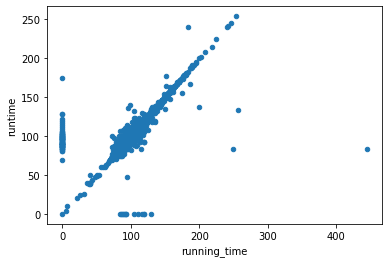

In [72]:
movies_df.fillna(0).plot(x='running_time', y='runtime', kind='scatter')

<AxesSubplot:xlabel='budget_wiki', ylabel='budget_kaggle'>

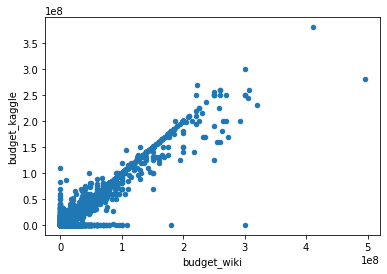

In [73]:
movies_df.fillna(0).plot(x='budget_wiki',y='budget_kaggle', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

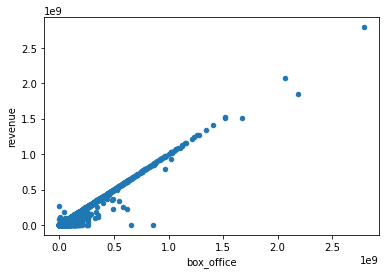

In [74]:
movies_df.fillna(0).plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='box_office', ylabel='revenue'>

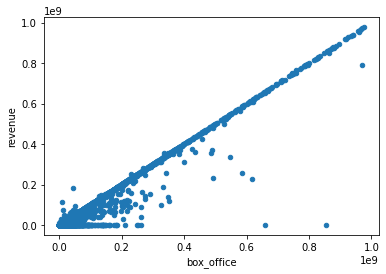

In [75]:
movies_df.fillna(0)[movies_df['box_office'] < 10**9].plot(x='box_office', y='revenue', kind='scatter')

<AxesSubplot:xlabel='release_date_wiki'>

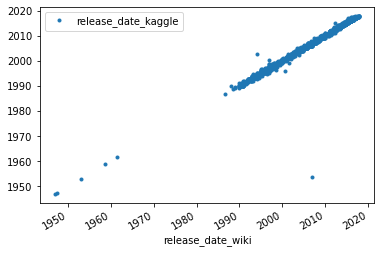

In [76]:
movies_df[['release_date_wiki','release_date_kaggle']].plot(x='release_date_wiki', y='release_date_kaggle', style='.')


In [77]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')]

url  year  \
3607  https://en.wikipedia.org/wiki/The_Holiday  2006   

                                   imdb_link   title_wiki Based on  \
3607  https://www.imdb.com/title/tt00457939/  The Holiday      NaN   

                                               Starring Cinematography  \
3607  [Kate Winslet, Cameron Diaz, Jude Law, Jack Bl...    Dean Cundey   

                              Release date        Country Language  ...  \
3607  [December 8, 2006, (, 2006-12-08, )]  United States  English  ...   

     release_date_kaggle              revenue              runtime  \
3607          1953-08-28        30,500,000.00               118.00   

                              spoken_languages    status  \
3607  [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                                tagline  \
3607  Pouring out of impassioned pages...brawling th...   

               title_kaggle  video         vote_average           vote_count  
3607  From Here to Eternity  False                 7.20               137.00  

[1 rows x 44 columns]

In [82]:
movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index

Int64Index([], dtype='int64')

In [83]:
movies_df = movies_df.drop(movies_df[(movies_df['release_date_wiki'] > '1996-01-01') & (movies_df['release_date_kaggle'] < '1965-01-01')].index)

In [85]:
movies_df[movies_df['release_date_wiki'].isnull()]

url  year  \
20         https://en.wikipedia.org/wiki/Cadence_(film)  1990   
38    https://en.wikipedia.org/wiki/The_Dark_Side_of...  1990   
53      https://en.wikipedia.org/wiki/Faces_of_Death_IV  1990   
65          https://en.wikipedia.org/wiki/Getting_Lucky  1990   
93    https://en.wikipedia.org/wiki/Industrial_Symph...  1990   
...                                                 ...   ...   
5879  https://en.wikipedia.org/wiki/Bridget_Jones%27...  2016   
5917  https://en.wikipedia.org/wiki/Trespass_Against_Us  2017   
5940  https://en.wikipedia.org/wiki/The_Girl_with_Al...  2017   
5986     https://en.wikipedia.org/wiki/Lowriders_(film)  2017   
5988       https://en.wikipedia.org/wiki/Paris_Can_Wait  2017   

                                  imdb_link                   title_wiki  \
20    https://www.imdb.com/title/tt0101531/                      Cadence   
38    https://www.imdb.com/title/tt0099364/    The Dark Side of the Moon   
53    https://www.imdb.com/title/tt0121262/            Faces of Death IV   
65    https://www.imdb.com/title/tt0099648/                Getting Lucky   
93    https://www.imdb.com/title/tt0099844/    Industrial Symphony No. 1   
...                                     ...                          ...   
5879  https://www.imdb.com/title/tt1473832/         Bridget Jones's Baby   
5917  https://www.imdb.com/title/tt3305308/          Trespass Against Us   
5940  https://www.imdb.com/title/tt4547056/  The Girl with All the Gifts   
5986  https://www.imdb.com/title/tt1366338/                    Lowriders   
5988  https://www.imdb.com/title/tt4429194/               Paris Can Wait   

                                               Based on  \
20                                                  NaN   
38                                                  NaN   
53                                                  NaN   
65                                                  NaN   
93                                                  NaN   
...                                                 ...   
5879                    [Characters, by Helen Fielding]   
5917                                                NaN   
5940  [The Girl with All the Gifts, by Mike Carey, (...   
5986                                                NaN   
5988                                                NaN   

                                               Starring      Cinematography  \
20    [Charlie Sheen, Martin Sheen, Laurence Fishbur...   Richard Leiterman   
38    [Robert Sampson, Will Bledsoe, Joe Turkel, Cam...                 NaN   
53                                    James B. Schwartz       Peter B. Good   
65    [Steven Cooke, Lezlie Z. McCraw, Rick McDowell...  Gerald M. Williams   
93    [Laura Dern, Nicolas Cage, Julee Cruise, Micha...                 NaN   
...                                                 ...                 ...   
5879  [Renée Zellweger, Colin Firth, Patrick Dempsey...         Andrew Dunn   
5917  [Michael Fassbender, Brendan Gleeson, Lyndsey ...            Edu Grau   
5940  [Gemma Arterton, Paddy Considine, Glenn Close,...        Simon Dennis   
5986  [Demián Bichir, Gabriel Chavarria, Theo Rossi,...   Andrés E. Sánchez   
5988           [Diane Lane, Arnaud Viard, Alec Baldwin]    Crystal Fournier   

                                           Release date  \
20    [1990, (, 1990, ), (Deauville Film Festival), ...   
38                                   [1990, (, 1990, )]   
53                                   [1990, (, 1990, )]   
65                                   [1990, (, 1990, )]   
93                                                 1990   
...                                                 ...   
5879  [5 September 2016, (, 2016-09-05, ), (London),...   
5917  [9 September 2016, (, 2016-09-09, ), (, Toront...   
5940  [3 August 2016, (, 2016-08-03, ), (Locarno Fil...   
5986  [June 1, 2016, (, 2016-06-01, ), (, LAFF, ), M...   
5988  [12 September 2016, (, 2016-09-12, ), (, TIFF

In [86]:
movies_df['Language'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


English                        5479
[English, Spanish]               68
[English, French]                35
[English, Japanese]              25
[English, Russian]               23
                               ... 
[English /, Zulu]                 1
[English, Hebrew, Spanish]        1
[English, Japanese, French]       1
[English, Spanish, Apache]        1
Russian                           1
Name: Language, Length: 197, dtype: int64

In [87]:
movies_df['Language'].apply(lambda x: tuple(x) if type(x) == list else x).value_counts(dropna=False)

English                        5479
NaN                             134
(English, Spanish)               68
(English, French)                35
(English, Japanese)              25
                               ... 
(English /, Zulu)                 1
(English, Hebrew, Spanish)        1
(English, Japanese, French)       1
(English, Spanish, Apache)        1
Russian                           1
Name: Language, Length: 198, dtype: int64

In [88]:
movies_df['original_language'].value_counts(dropna=False)

en    5987
fr      16
es      10
it       8
de       6
ja       4
pt       4
zh       4
da       2
hi       2
sv       1
ko       1
ab       1
tr       1
he       1
ar       1
cn       1
ru       1
Name: original_language, dtype: int64

In [89]:
movies_df[['Production company(s)','production_companies']]

Production company(s)  \
0                                       Silver Pictures   
1                                       Avenue Pictures   
2                 [Carolco Pictures, IndieProd Company]   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
6047                           [Fabula, Komplizen Film]   
6048                           Ball & Chain Productions   
6049          [Arte France Cinéma, Why Not Productions]   
6050  [Film Science, Rough House Pictures, Syncopate...   
6051         [HanWay Films, Little Punk, See-Saw Films]   

                                   production_companies  
0     [{'name': 'Twentieth Century Fox Film Corporat...  
1     [{'name': 'Avenue Pictures Productions', 'id':...  
2     [{'name': 'IndieProd Company Productions', 'id...  
3                [{'name': 'Orion Pictures', 'id': 41}]  
4             [{'name': 'Paramount Pictures', 'id': 4}]  
...                                                 ...  
6047  [{'name': 'Komplizen Film', 'id': 1618}, {'nam...  
6048  [{'name': 'Ball & Chain Productions', 'id': 74...  
6049  [{'name': 'ARTE France Cinéma', 'id': 94}, {'n...  
6050  [{'name': 'Film Science', 'id': 1976}, {'name'...  
6051  [{'name': 'HanWay Films', 'id': 2395}, {'name'...  

[6051 rows x 2 columns]

In [ ]:
# Enact competing data plan
movies_df.drop(columns=['title_wiki','release_date_wiki','Language','Production company(s)'], inplace=True)

def fill_missing_kaggle_data(df, kaggle_column, wiki_column):
    df[kaggle_column] = df.apply(
        lambda row: row[wiki_column] if row[kaggle_column] == 0 else row[kaggle_column]
        , axis=1)
    df.drop(columns=wiki_column, inplace=True)
    
fill_missing_kaggle_data(movies_df, 'runtime', 'running_time')
fill_missing_kaggle_data(movies_df, 'budget_kaggle', 'budget_wiki')
fill_missing_kaggle_data(movies_df, 'revenue', 'box_office')
movies_df

In [91]:
for col in movies_df.columns:
    lists_to_tuples = lambda x: tuple(x) if type(x) == list else x
    value_counts = movies_df[col].apply(lists_to_tuples).value_counts(dropna=False)
    num_values = len(value_counts)
    if num_values == 1:
        print(col)

video


In [92]:
movies_df['video'].value_counts(dropna=False)

False    6051
Name: video, dtype: int64

In [95]:
movies_df.drop(columns=['video'], inplace=True)

In [96]:
movies_df = movies_df.loc[:, ['imdb_id','id','title_kaggle','original_title','tagline','belongs_to_collection','url','imdb_link',
                       'runtime','budget_kaggle','revenue','release_date_kaggle','popularity','vote_average','vote_count',
                       'genres','original_language','overview','spoken_languages','Country',
                       'production_companies','production_countries','Distributor',
                       'Producer(s)','Director','Starring','Cinematography','Editor(s)','Writer(s)','Composer(s)','Based on'
                      ]]

In [97]:
movies_df.rename({'id':'kaggle_id',
                  'title_kaggle':'title',
                  'url':'wikipedia_url',
                  'budget_kaggle':'budget',
                  'release_date_kaggle':'release_date',
                  'Country':'country',
                  'Distributor':'distributor',
                  'Producer(s)':'producers',
                  'Director':'director',
                  'Starring':'starring',
                  'Cinematography':'cinematography',
                  'Editor(s)':'editors',
                  'Writer(s)':'writers',
                  'Composer(s)':'composers',
                  'Based on':'based_on'
                 }, axis='columns', inplace=True)

In [101]:
# Transform and Merge Rating Data
rating_counts = ratings.groupby(['movieId','rating'], as_index=False).count() \
                .rename({'userId':'count'}, axis=1) \
                .pivot(index='movieId',columns='rating', values='count')

rating_counts.columns = ['rating_' + str(col) for col in rating_counts.columns]

movies_with_ratings_df = pd.merge(movies_df, rating_counts, left_on='kaggle_id', right_index=True, how='left')

movies_with_ratings_df[rating_counts.columns] = movies_with_ratings_df[rating_counts.columns].fillna(0)